In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('banana_quality.csv')
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [32]:
data.shape

(8000, 8)

In [33]:
print('No. of rows :',data.shape[0])
print('No. of columns:',data.shape[1])

No. of rows : 8000
No. of columns: 8


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


All the features are numeric except the target variable.

In [35]:
# 5 point summary
data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [36]:
# missing values
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

There are no missing values.

In [37]:
data.Quality.value_counts()

Good    4006
Bad     3994
Name: Quality, dtype: int64

Classes are balanced.

In [38]:
num_col = data.select_dtypes(include=np.number)

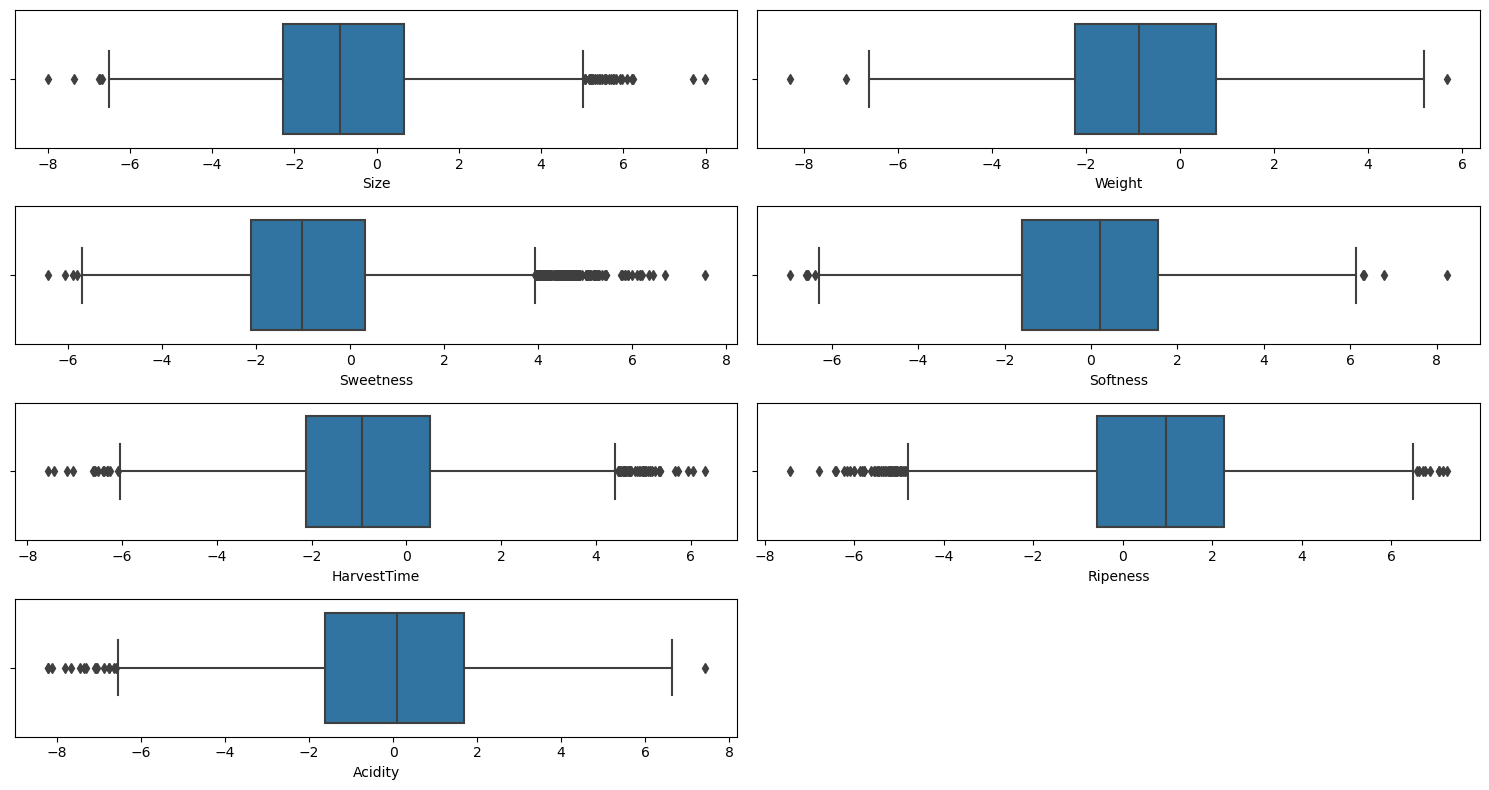

In [39]:
# outliers
plt.figure(figsize=(15,8))
t=1
for i in num_col:
    plt.subplot(4,2,t)
    sns.boxplot(x =data[i])
    t+=1
plt.tight_layout()
plt.show()

In [40]:
# remove the outliers
q3 = num_col.quantile(0.75)
q1 = num_col.quantile(0.25)

iqr = q3 -q1

ul = q3+iqr*1.5
ll = q1 -iqr*1.5

data = data[~((data>ul) |(data<ll)).any(axis=1)]

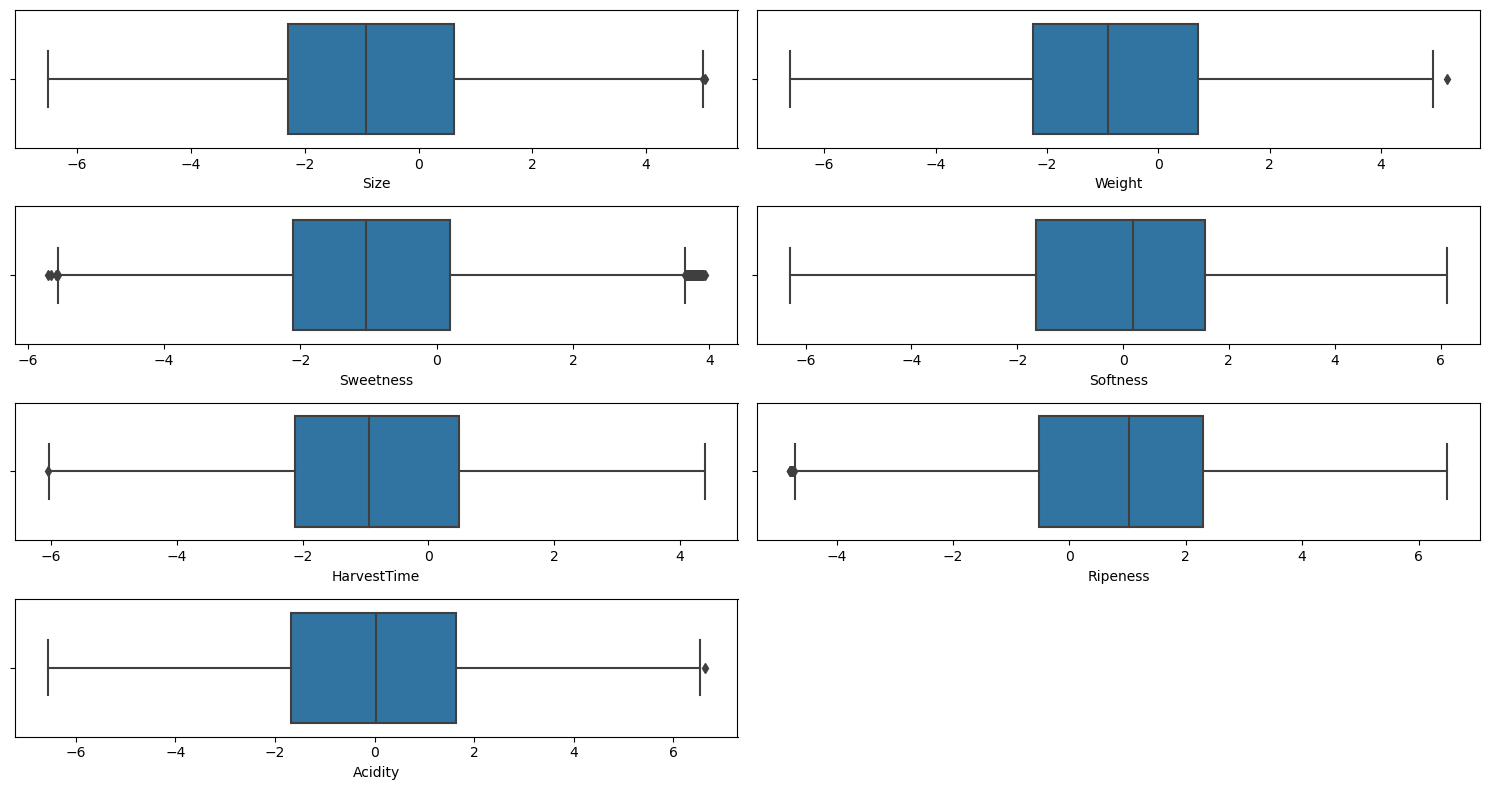

In [41]:
plt.figure(figsize=(15,8))
t=1
for i in num_col:
    plt.subplot(4,2,t)
    sns.boxplot(x =data[i])
    t+=1
plt.tight_layout()
plt.show()

<Axes: >

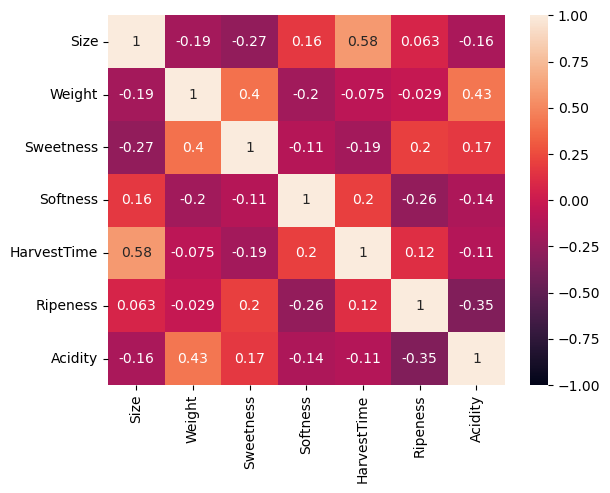

In [42]:
# correlation plot
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [43]:
data['Quality'] = data['Quality'].map({'Good':1,'Bad':0})

In [47]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma

In [46]:
x = data.drop(columns=['Quality'])
y = data.Quality

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=1)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5351, 7), (2294, 7), (5351,), (2294,))

In [50]:
y.value_counts(normalize=True)

0    0.512623
1    0.487377
Name: Quality, dtype: float64

In [51]:
y_train.value_counts(normalize=True)

0    0.510933
1    0.489067
Name: Quality, dtype: float64

In [53]:
y_test.value_counts(normalize=True)

0    0.516565
1    0.483435
Name: Quality, dtype: float64

In [54]:
import  scipy.stats as stats

In [57]:
observed = y_test.value_counts(normalize=True).values
expected = y.value_counts(normalize=True).values

In [58]:
stats.chisquare(observed,expected)

Power_divergenceResult(statistic=6.220728488043797e-05, pvalue=0.9937070224562262)

In [59]:
observed = y_train.value_counts(normalize=True).values
expected = y.value_counts(normalize=True).values

In [61]:
# Ho: The distribution is same
# Ha: The distribution is not same
stats.chisquare(expected,observed)

Power_divergenceResult(statistic=1.143112503647239e-05, pvalue=0.9973023616829657)

In [63]:
 # fit the base model 
base_model = sma.Logit(y_train,sma.add_constant(x_train)).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.291736
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Quality   No. Observations:                 5351
Model:                          Logit   Df Residuals:                     5343
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  0.5790
Time:                        18:37:36   Log-Likelihood:                -1561.1
converged:                       True   LL-Null:                       -3707.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6542      0.078     21.161      0.000       1.501       1.807
Size            0.6863      0.031     21.827      0.000       0.625       0.748
Weight          1.0085      0.038     26.363      0.000       0.934       1.083
Sweetness       0.7484      0.034     21.844      0.000       0.681       0.816
Softness        0.0880      0.024      3.661      0.000       0.041       0.135
HarvestTime     0.5735      0.033     17.408      0.000       0.509       0.638
Ripeness        0.6164      0.031     19.737      0.000       0.555       0.678
Acidity        -0.0948      0.024     -3.912      0.000      -0.142      -0.047
===============================================================================
"""

In [65]:
base_model.pvalues[base_model.pvalues<0.5].sort_values()

Weight         3.612560e-153
Sweetness      8.947099e-106
Size           1.272542e-105
const           2.200189e-99
Ripeness        1.029615e-86
HarvestTime     7.169623e-68
Acidity         9.162302e-05
Softness        2.517061e-04
dtype: float64


All the features are significant to decide the quality of banana.

In [66]:
prob = base_model.predict(sma.add_constant(x_test))
prob

4061    0.695228
7368    0.440515
6421    0.180845
907     0.976123
4035    0.964549
          ...   
6140    0.003888
7349    0.621701
1529    0.998451
1017    0.989963
5301    0.991517
Length: 2294, dtype: float64

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [68]:
pred = np.where(prob>0.5,1,0)

In [70]:
print('Accuracy:',accuracy_score(y_test,pred))

Accuracy: 0.8696599825632084


In [71]:
print('Classification Report:',classification_report(y_test,pred))

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1185
           1       0.86      0.87      0.87      1109

    accuracy                           0.87      2294
   macro avg       0.87      0.87      0.87      2294
weighted avg       0.87      0.87      0.87      2294



In [72]:
print('Confusion Matrix:',confusion_matrix(y_test,pred))

Confusion Matrix: [[1030  155]
 [ 144  965]]


Inferences : Model is significant with accuracy 87%.